## Assignment 4 Linear Regression

#### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. 

### Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Loading Dataset

In [32]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/home/karan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

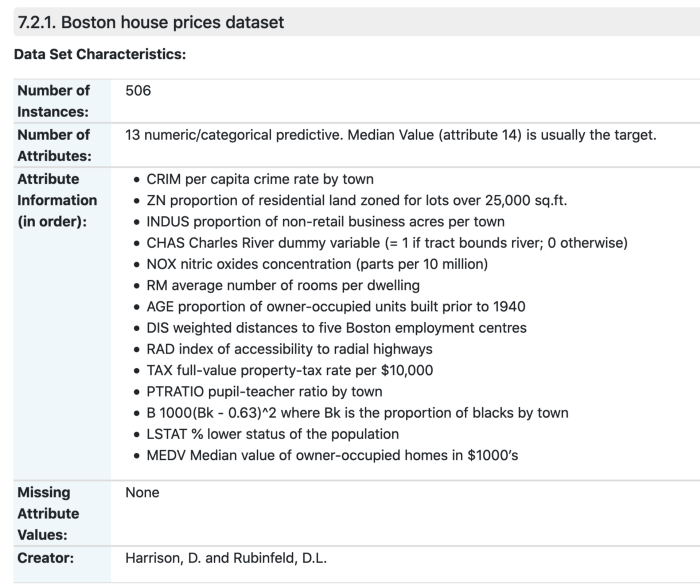

### Data Preprocessing

In [33]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [34]:
df['MEDV'] = boston_dataset.target

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
df.shape

(506, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [40]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/home/karan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


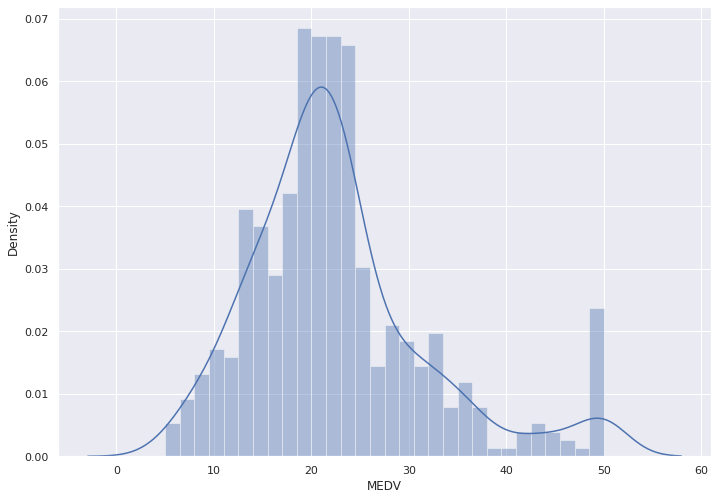

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

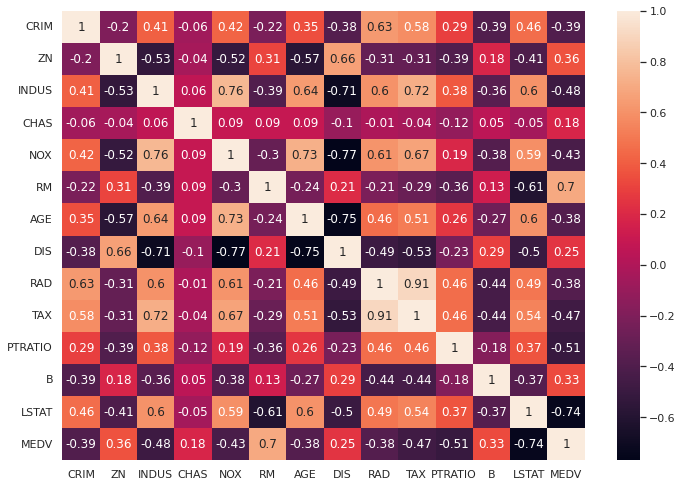

In [42]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

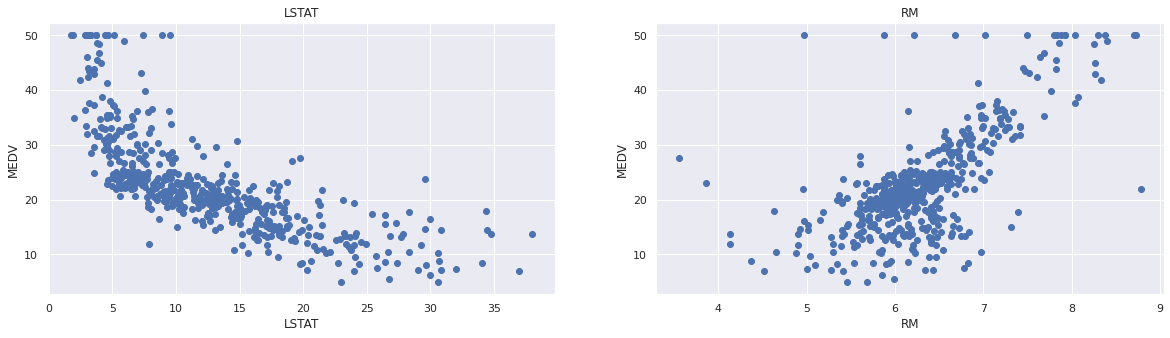

In [43]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Considering all variables

In [44]:
X=df.drop(['MEDV'], axis = 1)
Y = df['MEDV']

## With 80-20 split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 3)

In [46]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [48]:
## model evaluation

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [49]:
model.intercept_

35.86168334503623

In [50]:
model.coef_

array([-1.23897571e-01,  4.81822924e-02, -4.74497796e-02,  3.36938950e+00,
       -1.56635488e+01,  3.59419367e+00, -9.33206067e-03, -1.47089101e+00,
        3.05053544e-01, -1.08397039e-02, -9.08791339e-01,  1.00352939e-02,
       -4.77714677e-01])

In [51]:
coeffcients = pd.DataFrame([X.columns,model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.123898
1,ZN,0.048182
2,INDUS,-0.04745
3,CHAS,3.369389
4,NOX,-15.663549
5,RM,3.594194
6,AGE,-0.009332
7,DIS,-1.470891
8,RAD,0.305054
9,TAX,-0.01084


/home/karan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RM')

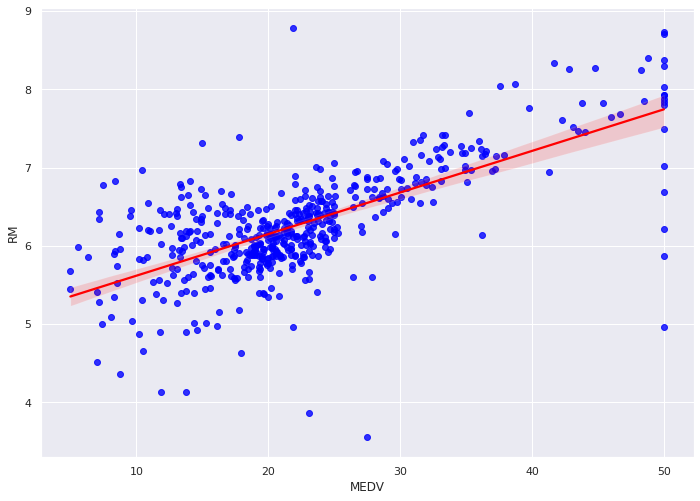

In [52]:
x=df['MEDV']
sns.regplot(x,df['RM'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('MEDV')
plt.ylabel('RM')

Text(0, 0.5, 'LSTAT')

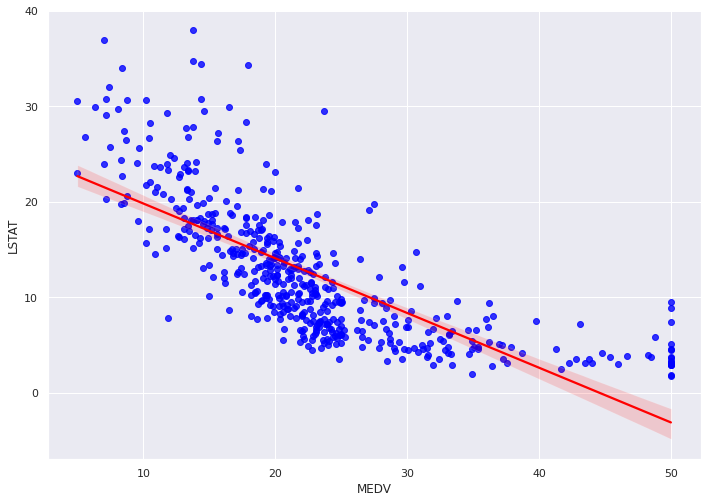

In [53]:
x=df['MEDV']
sns.regplot(x,df['LSTAT'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

In [78]:
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 '

In [54]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 3.3580458635349446
MSE: 23.411132710507932
RMSE: 4.838505214475637
R2: 0.7239410298290111

 
-------------

 
For test data
MAE: 3.0142502752403417
MSE: 16.943073013833846
RMSE: 4.116196425564971
R2: 0.795261756324385


In [81]:
model.score(X_test, Y_test)

0.526578909709011

### For 75 - 25 split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 3)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [57]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 3.341806419499041
MSE: 23.26250240875551
RMSE: 4.82312164565186
R2: 0.7280659533306795

 
-------------

 
For test data
MAE: 3.1578374671447667
MSE: 18.89625590870693
RMSE: 4.346982391119951
R2: 0.7668895327325073


### For 70 - 30 split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 3)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [60]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 3.300292026221153
MSE: 22.419716470044353
RMSE: 4.734946300650552
R2: 0.7419034960343789

 
-------------

 
For test data
MAE: 3.4005089565979896
MSE: 22.431936070737514
RMSE: 4.736236488050139
R2: 0.7147895265576851


### FOR SINGLE VARIABLE

In [61]:
X=df['RM'].values.reshape(-1,1)
Y=df['MEDV']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 3)

In [63]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(404, 1) (102, 1) (404,) (102,)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [65]:
## model evaluation

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [66]:
model.intercept_

-34.1184892498833

In [67]:
model.coef_

array([9.01161594])

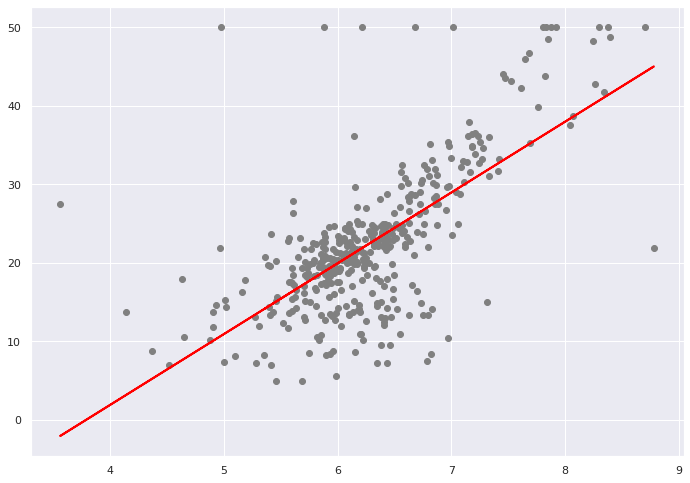

In [68]:
plt.scatter(X_train, Y_train,  color='gray')
plt.plot(X_train, y_train_predicted, color='red', linewidth=2)
plt.show()

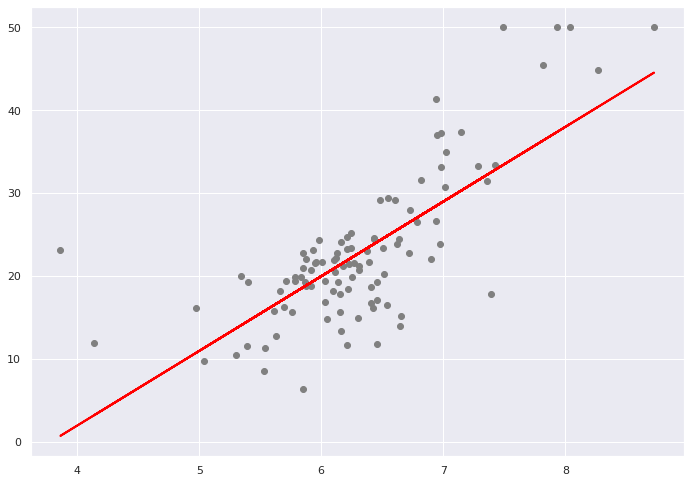

In [69]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_test_predicted, color='red', linewidth=2)
plt.show()

In [70]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 4.473577106360655
MSE: 45.67497069510493
RMSE: 6.758326027582934
R2: 0.4614107088025987

 
-------------

 
For test data
MAE: 4.365257521734308
MSE: 35.40560537877825
RMSE: 5.950260950477571
R2: 0.5721625318143688


### For 75 - 25 split

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 3)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [73]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 4.516007872069867
MSE: 46.67665524808729
RMSE: 6.8320315608234194
R2: 0.45435914315805537

 
-------------

 
For test data
MAE: 4.27051980891229
MSE: 34.47136935150457
RMSE: 5.871232353731589
R2: 0.5747497781728849


### For 70 - 30 split

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 3)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)


In [76]:
from sklearn import metrics
print("For train data")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_train_predicted)))
print('R2:',metrics.r2_score(Y_train, y_train_predicted))

print("\n ")
print("-------------")
print("\n ")
print("For test data")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_predicted)))
print('R2:',metrics.r2_score(Y_test, y_test_predicted))


For train data
MAE: 4.451076533881416
MSE: 46.39252838390492
RMSE: 6.811206088785225
R2: 0.465927706890933

 
-------------

 
For test data
MAE: 4.413899354994547
MSE: 37.23478841352651
RMSE: 6.1020314988966184
R2: 0.526578909709011


### Conclusion

#### Considering all the variables, we get minimum error for 80-20 split and by considering only the highest positively correlated feature ( RM in this case ) we get minimum error for 75-25 split